<a href="https://colab.research.google.com/github/nickehsani/CSE151A_DARWIN_Alzheimer-s/blob/main/Written_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE151A_DARWIN_Alzheimer's

#### Predictive modeling of Alzheimer's patients.


---



# Introduction

Early diagnosis of Alzheimer's disease remains the primary means to delay brain damage and improve the quality of life of people affected, therefore, predicting which early diagnosis methods are most effective is ideal. The DARWIN dataset (Diagnosis AlzheimeR WIth haNdwriting) contains handwriting data from people affected by Alzheimer's, as well as people without Alzheimer's, and is the largest publicly available in terms of participants and handwriting tasks. Our goal for this project was to leverage the DARWIN dataset to develop classification models that will evaluate which tasks are more effective at indicating Alzheimer's Disease, as well as the effectiveness of the specific features of each task.

#Methods


### Data Exploration

This data is labeled, requiring supervised learning. It has 174 observations/instances collected from 174 participants, and 451 features, that are divided into 25 tasks. We looked at a pairplot for the basic features corresponding to the first of these writing tasks; as well as a pairplot that compiled all the data across all tests for each basic feature, while color-coding the data for each test. Finally, we examined a heatmap of the correlation coefficients for the features from the first writing task. Our data was balanced, there was a near 50/50 split between patients (1) and healthy testers (0).

### Preprocessing

To first clean up the data, we searched for any NaN/invalid or missing values, but found none and did not have to do any imputation to fill the missing values. We then encoded the 'class' feature--whether an instance of data belongs to an Alzheimer's patient (P) or a healthy tester (H)--into binary values, with 1 for patient and 0 for healthy. The class feature is our target feature which we want to predict. Afterwards we created a list of datasets, where each item focuses on the data collected from a single writing test; there are 25 different tests total, each one with the same 18 basic features.

To finish processing the data, we tested for normality using shapiro tests, and found that very few of the columns were normally distributed. Therefore, we decided to minmax normalize our data after splitting it into X and Y datasets.

### Model 1: Logistic Regression
The first predictive model we decided to try was a basic logistic regression. First, some additional preprocessing steps were taken to make the data suited for logistic regression. The features were both normalized and standardized, and the data was split 80-20. Basic logistic regression was then performed on our train/test data.

The link to this Logistic Regression model can be found in the basic_logistic_regression.ipynb in our repository.

After seeing results from our initial model, we examined more logistic regression models using various regularization techniques, including L1 (lasso), L2 (ridge), and Elastic Net (mixed) regularization. For the latter, we used hyperparameter testing to determine an ideal ratio for L1 to L2 regularization. We then examined how each model's coefficient terms differed, and compared their performances on our test data.

The link to this Logistic Regression model can be found in the CSE_151A_Group_Project_Compared_Logistic_Regression_Models.ipynb in our repository.



### Model 2: Perceptron

For the perceptron model, we began by loading in the processed dataframe. The ID and Unnamed: 0 columns were dropped, and then the dataframe was split into X and y arrays, respresenting features and target. The features were normalized using MinMax, and the data was split 80-20.

An initial model was trained, and we reviewed its effectiveness via a classification report and a confusion matrix for both training and testing data. We used hinge loss for this model because it helps maximize margins between the two output classes.

After that, we iterated over 20 epochs using model.partial_fit in order to optimize the weights and reach a higher accuracy. We stored and plotted the acuracy of each epoch for testing and training data The value 20 was chosen after seeing the plot of test accuracy vs. train accuracy, because the values stabilize after about 5 epochs, but we wanted to capture beyond that in case there were any variations. We also stored and plotted the training and testing losses over the epochs.

We also plotted the weights for each feature, and then pulled out the 5 largest absolute value weights to see which 5 features had the largest impact on the prediction.

With the final model, we again evaluated its effectiveness using a classification report and a confusion matrix. We also looked at loss and accuracy.

The link to the Perceptron model can be found in the PerceptronModel.ipynb file in our repository.

### Model 3: Decision Tree

Lastly we made Decision tree and Random Forest models, and dropped ID and Unnamed: 0, and split the data into an 80-20 training and testing split. We trained the respective models and then balanced them to get an accuracy vs epoch graph for both. We also obtained classification reports and confusion matrices for these. A link to the Decision Tree and Random Forest models are located in DARWIN_Decision_Tree.ipynb.

## Results

### Model 1: Logistic Regression


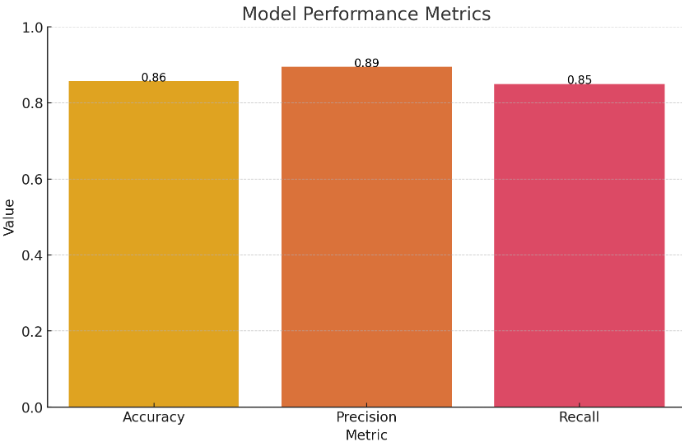

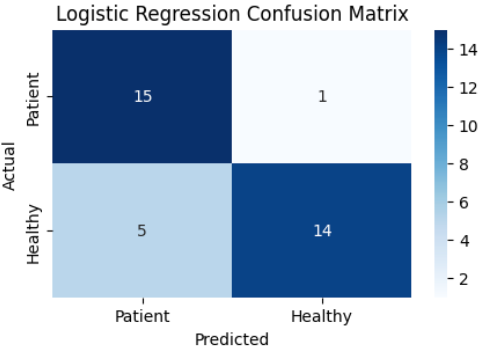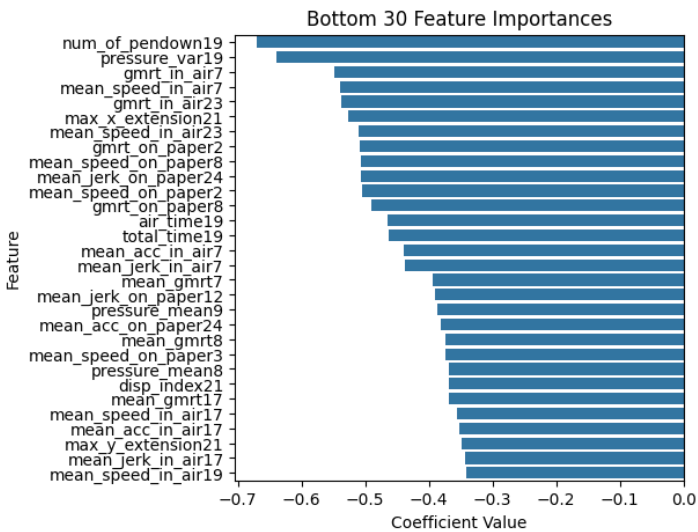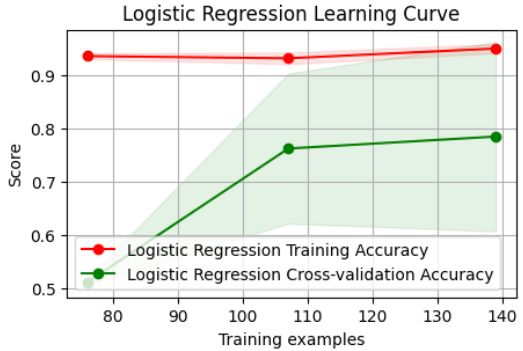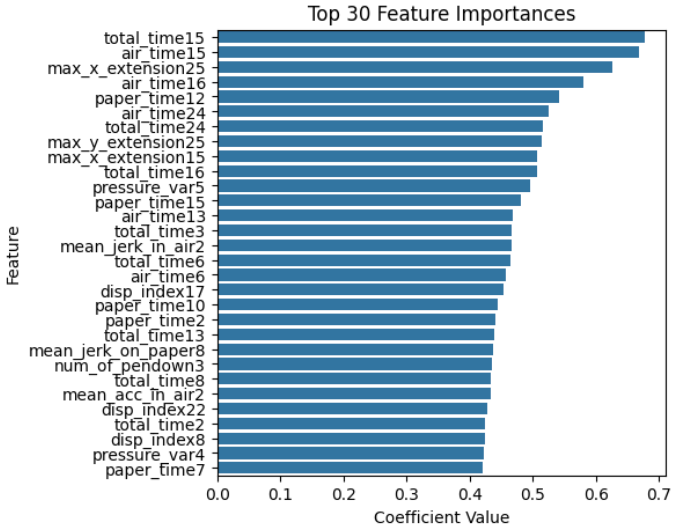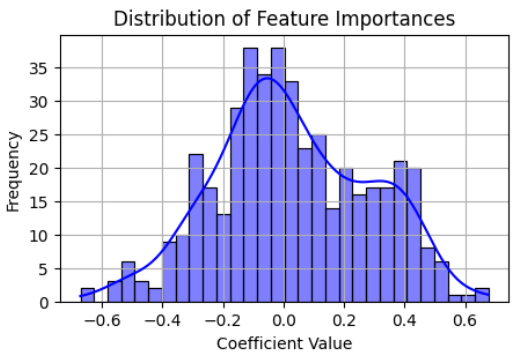

Due to its high training accuracy, we considered that our initial model may have overfitted to our training data. To avoid this, we decided to apply different regularization techniques to our model.

The first model used Lasso Regularization, which (as expected), pushed the values of many small coefficients to 0. It performed worse than the initial model, however, with a 97% training accuracy and only 83% testing accuracy.

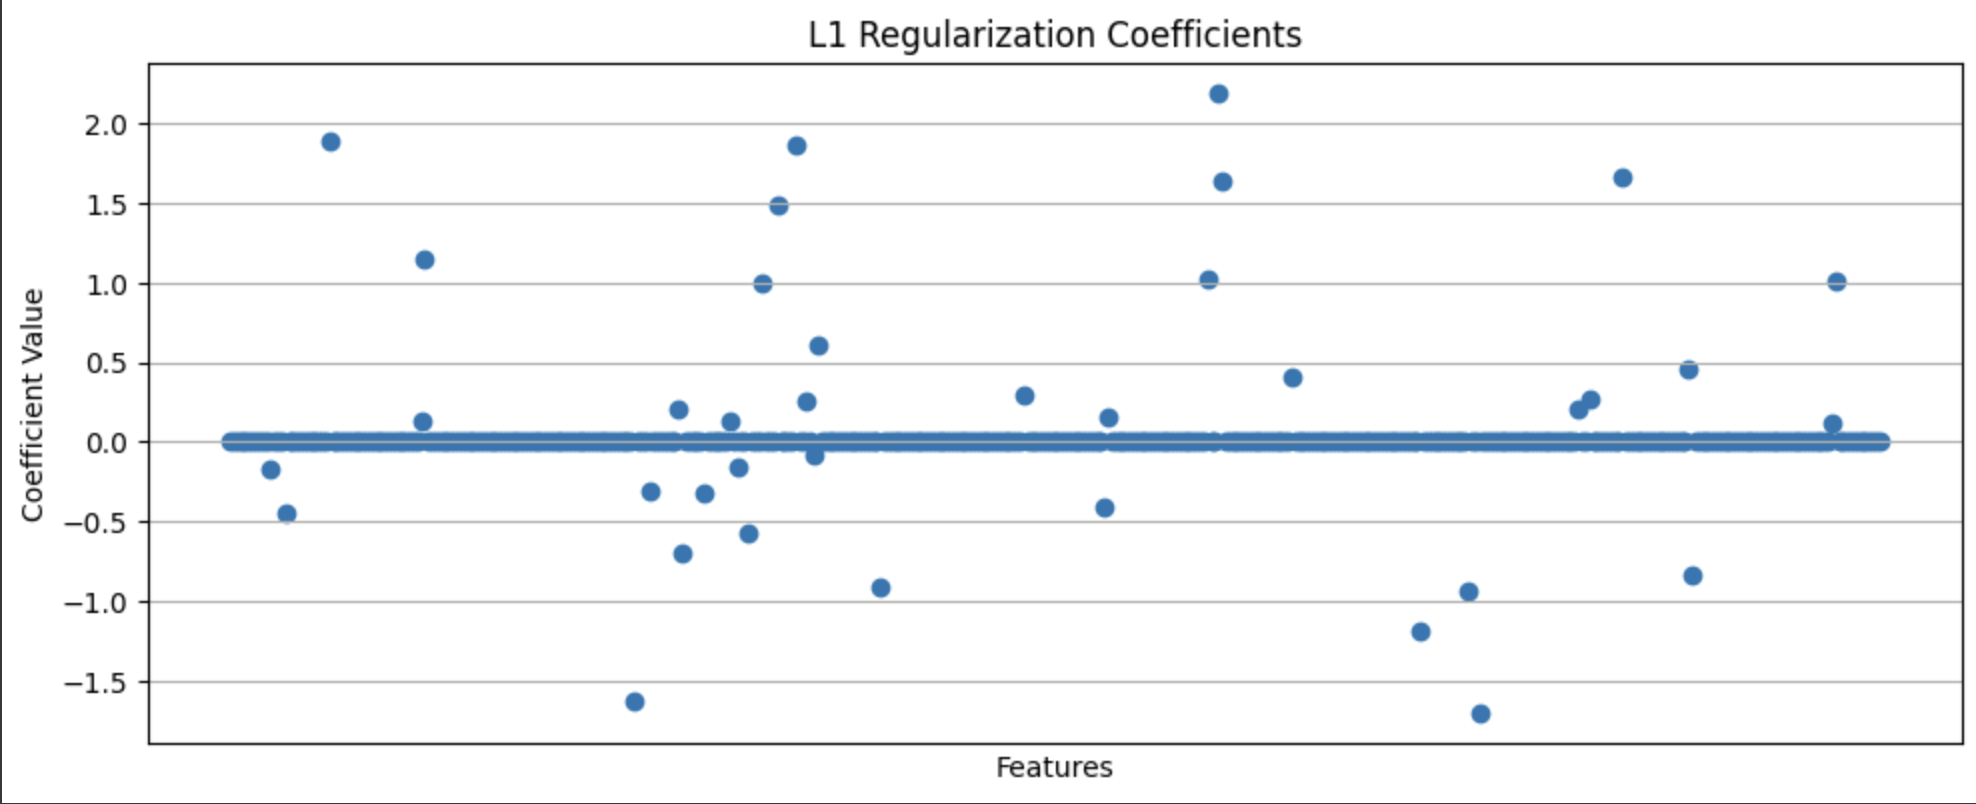

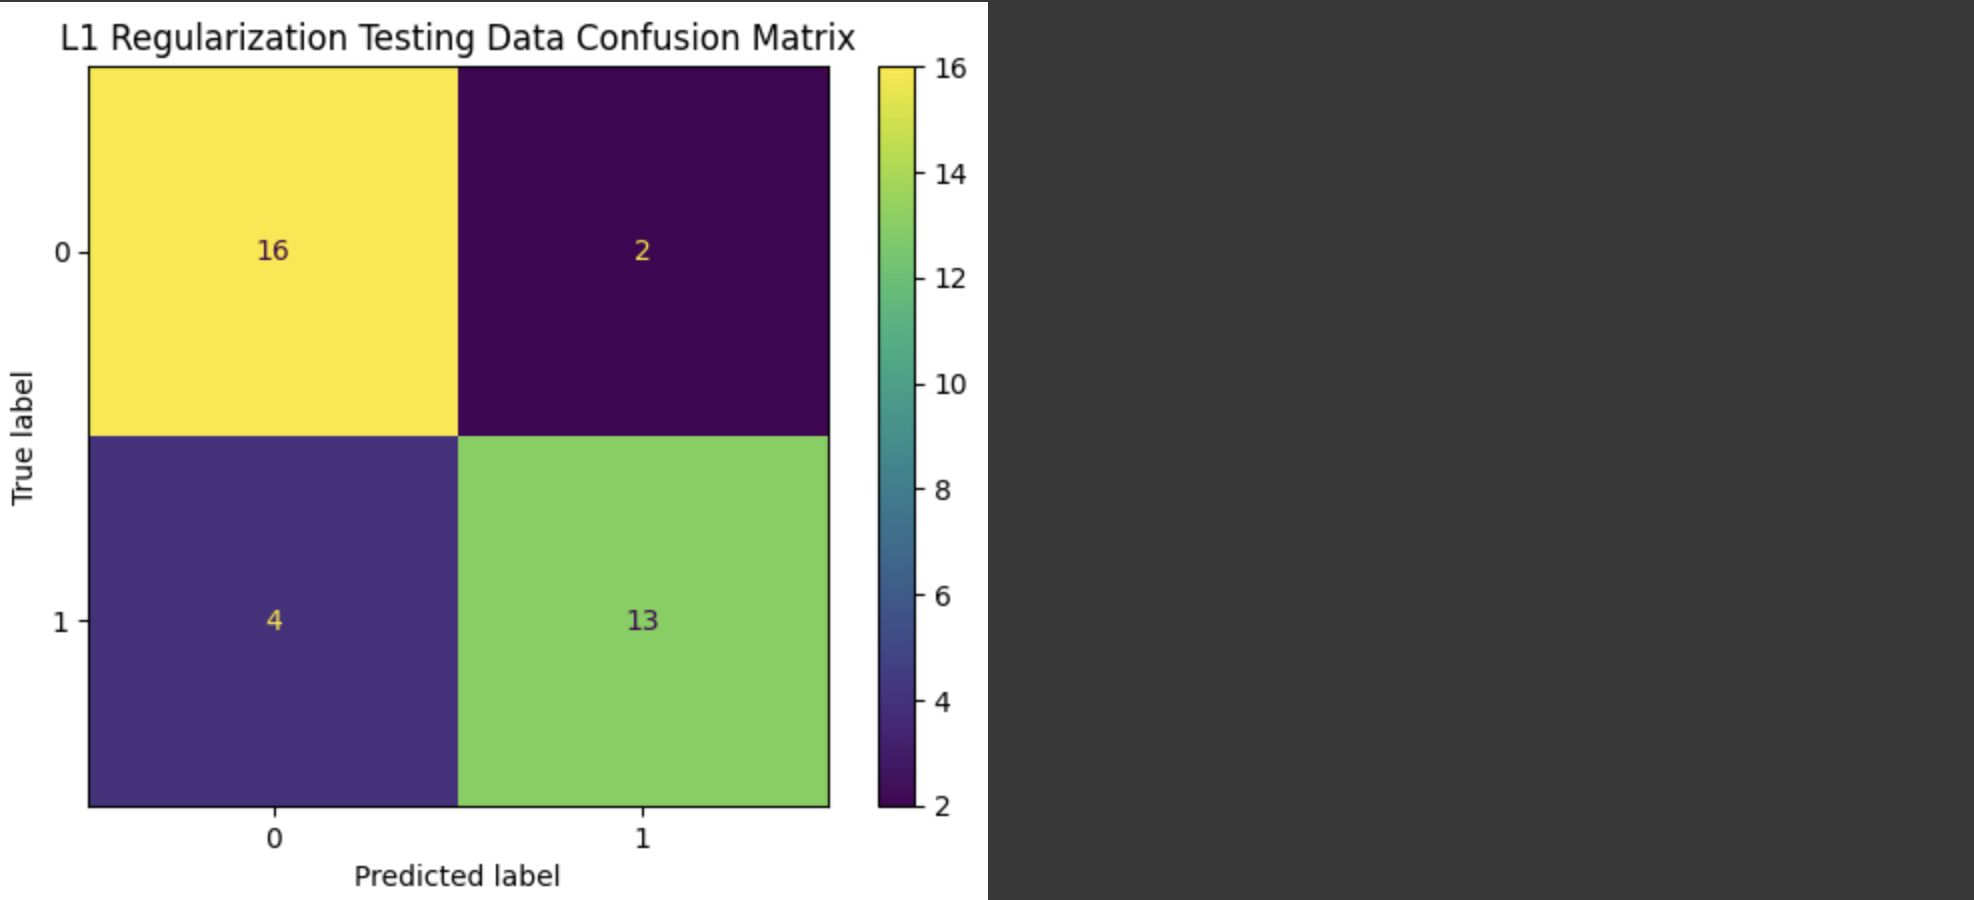

Due to its high training accuracy, we considered that our initial model may have overfitted to our training data. To avoid this, we decided to apply different regularization techniques to our model.

The first model used Lasso Regularization, which (as expected), pushed the values of many small coefficients to 0. It performed worse than the initial model, however, with a 97% training accuracy and only 83% testing accuracy.

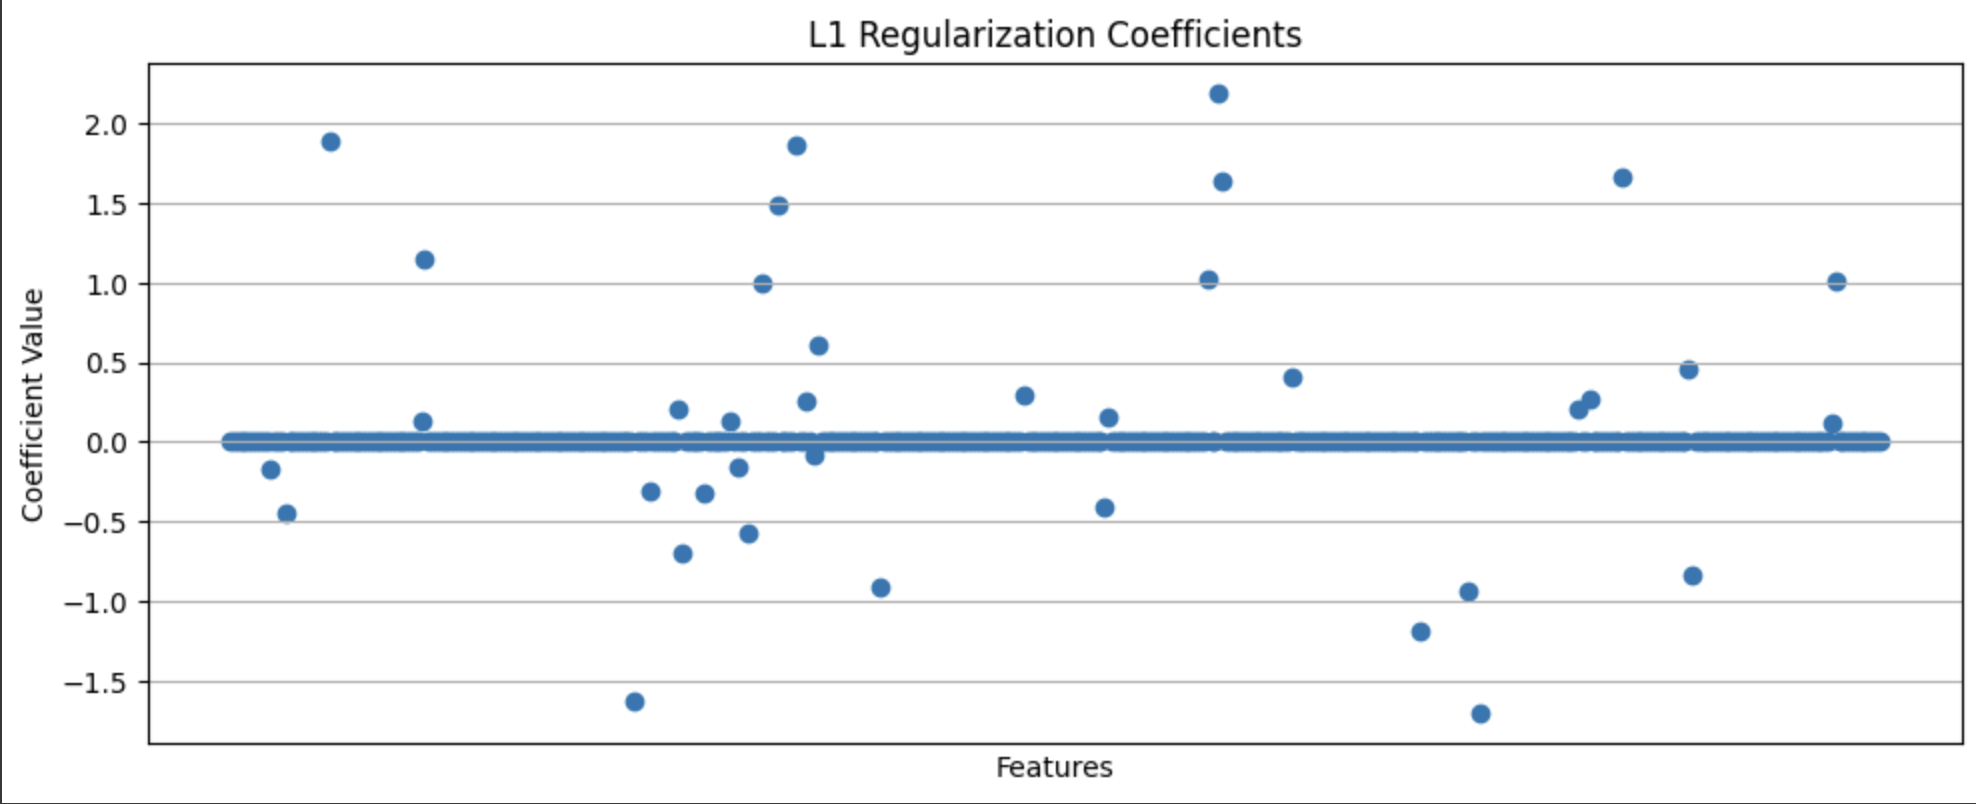

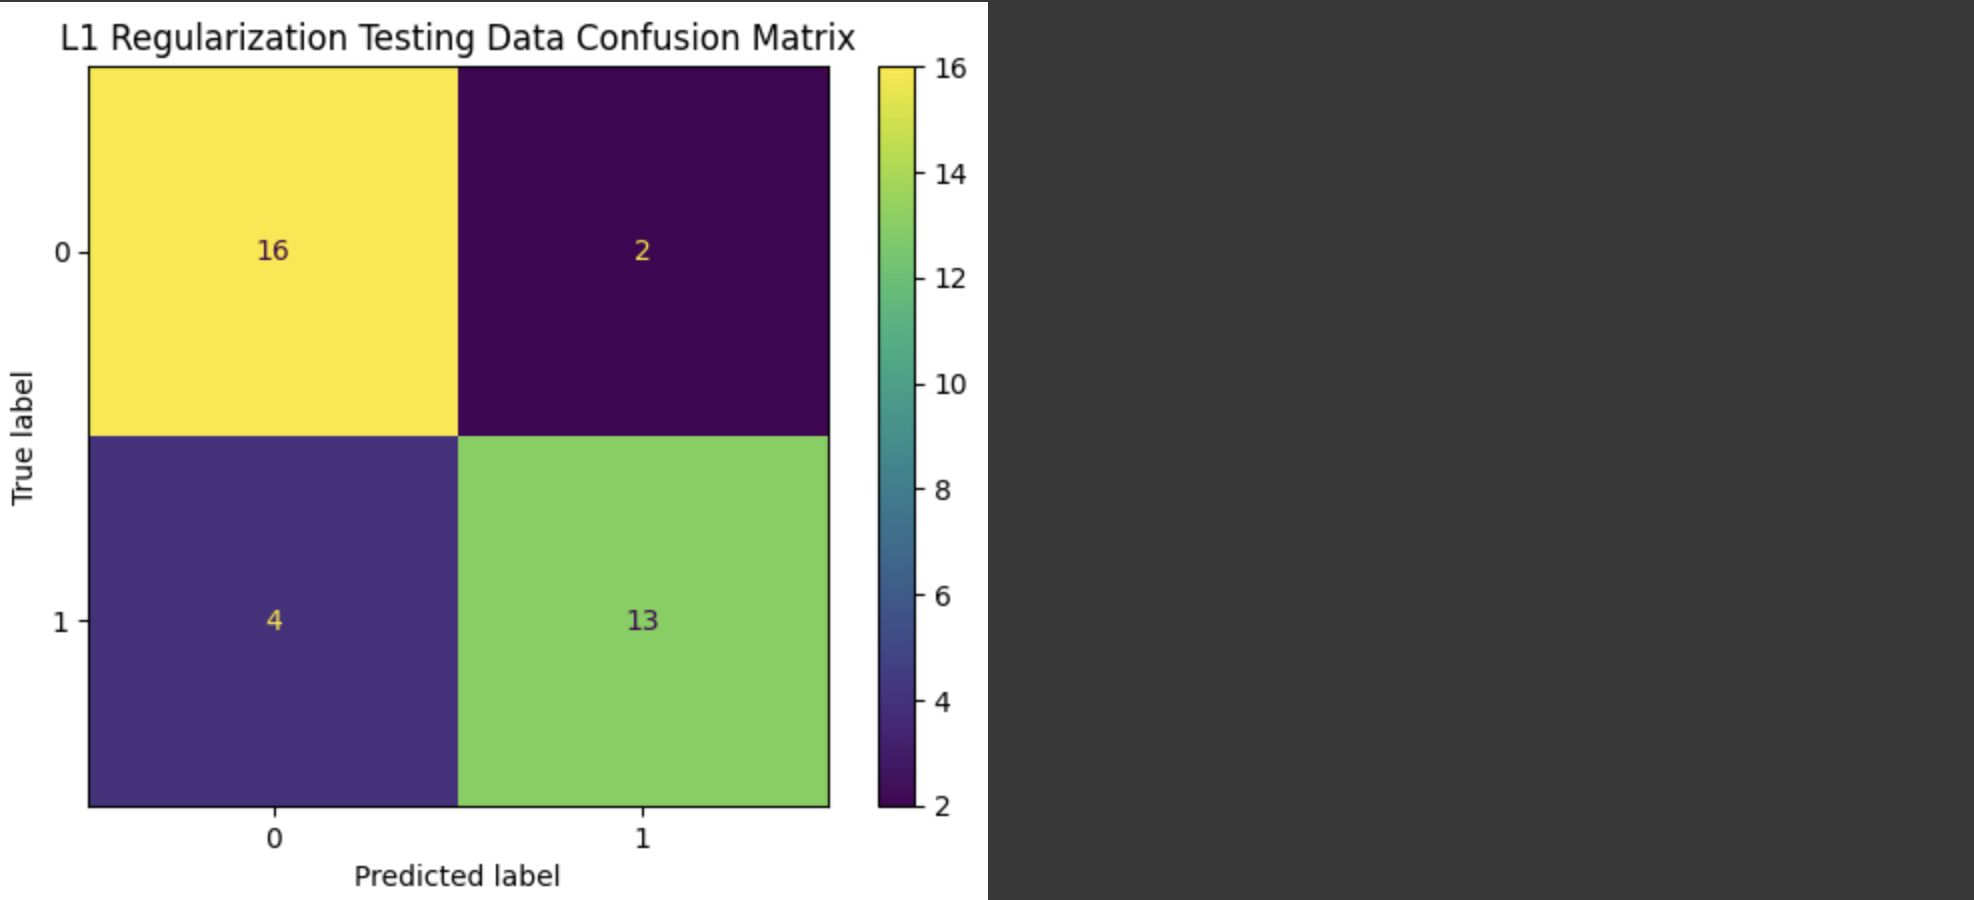

With the L2 regularization model, coefficients were much more evenly distributed compared to the coefficients from L1 regularization. The training and testing accuracies were 100% and 86%, respectively.

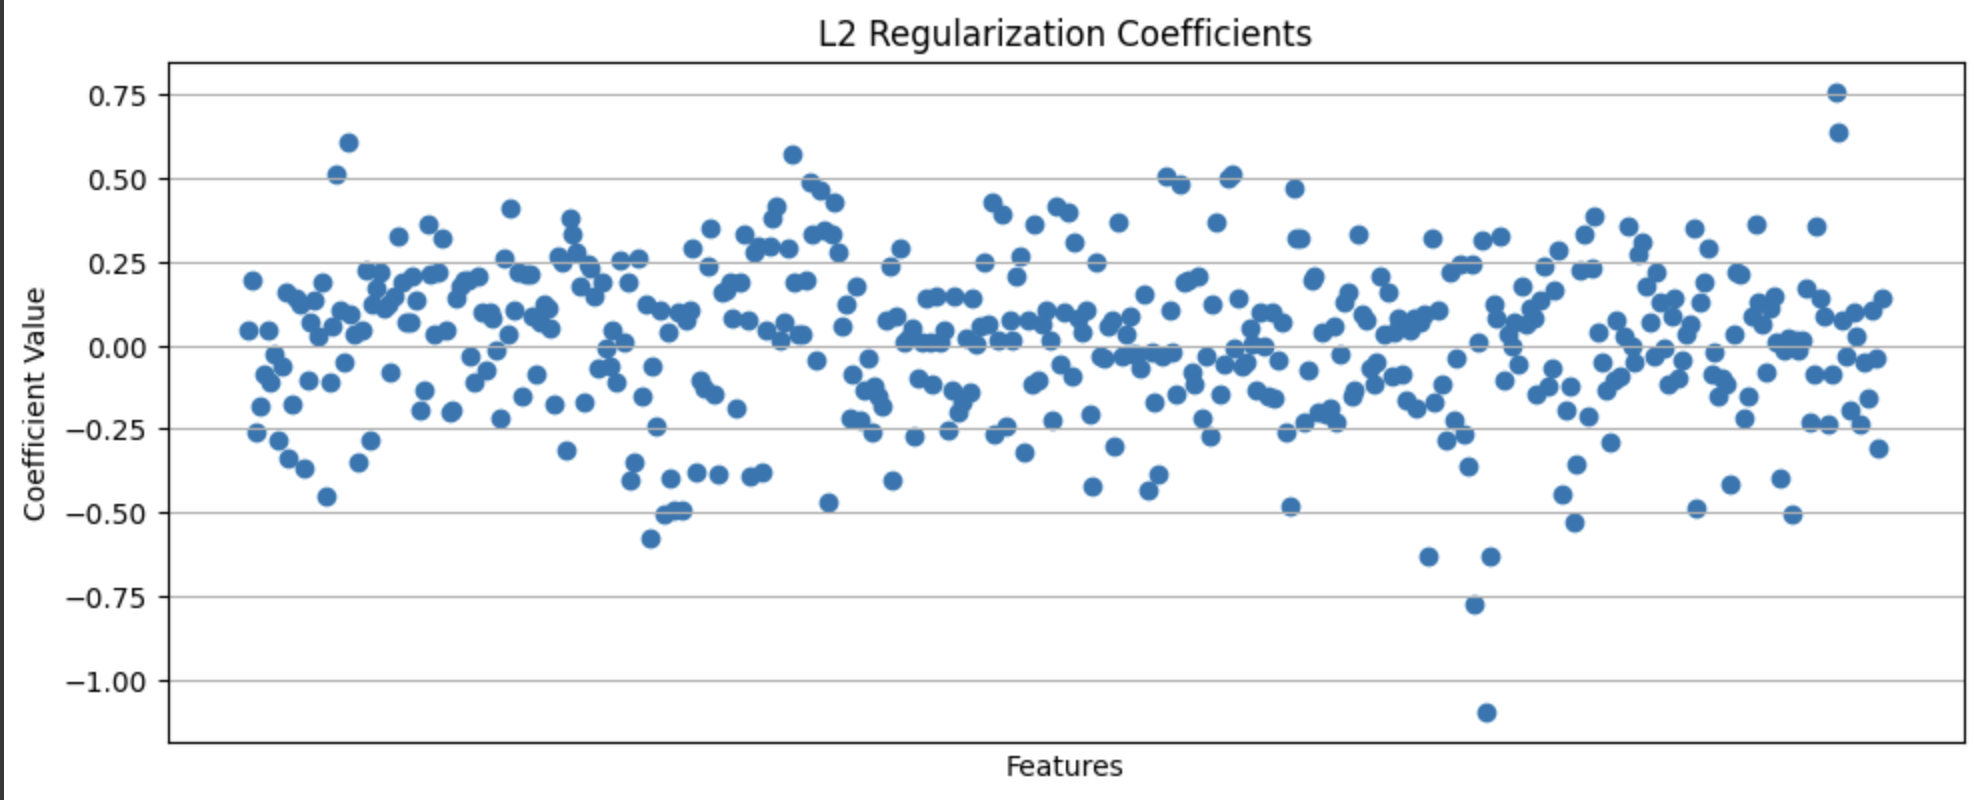

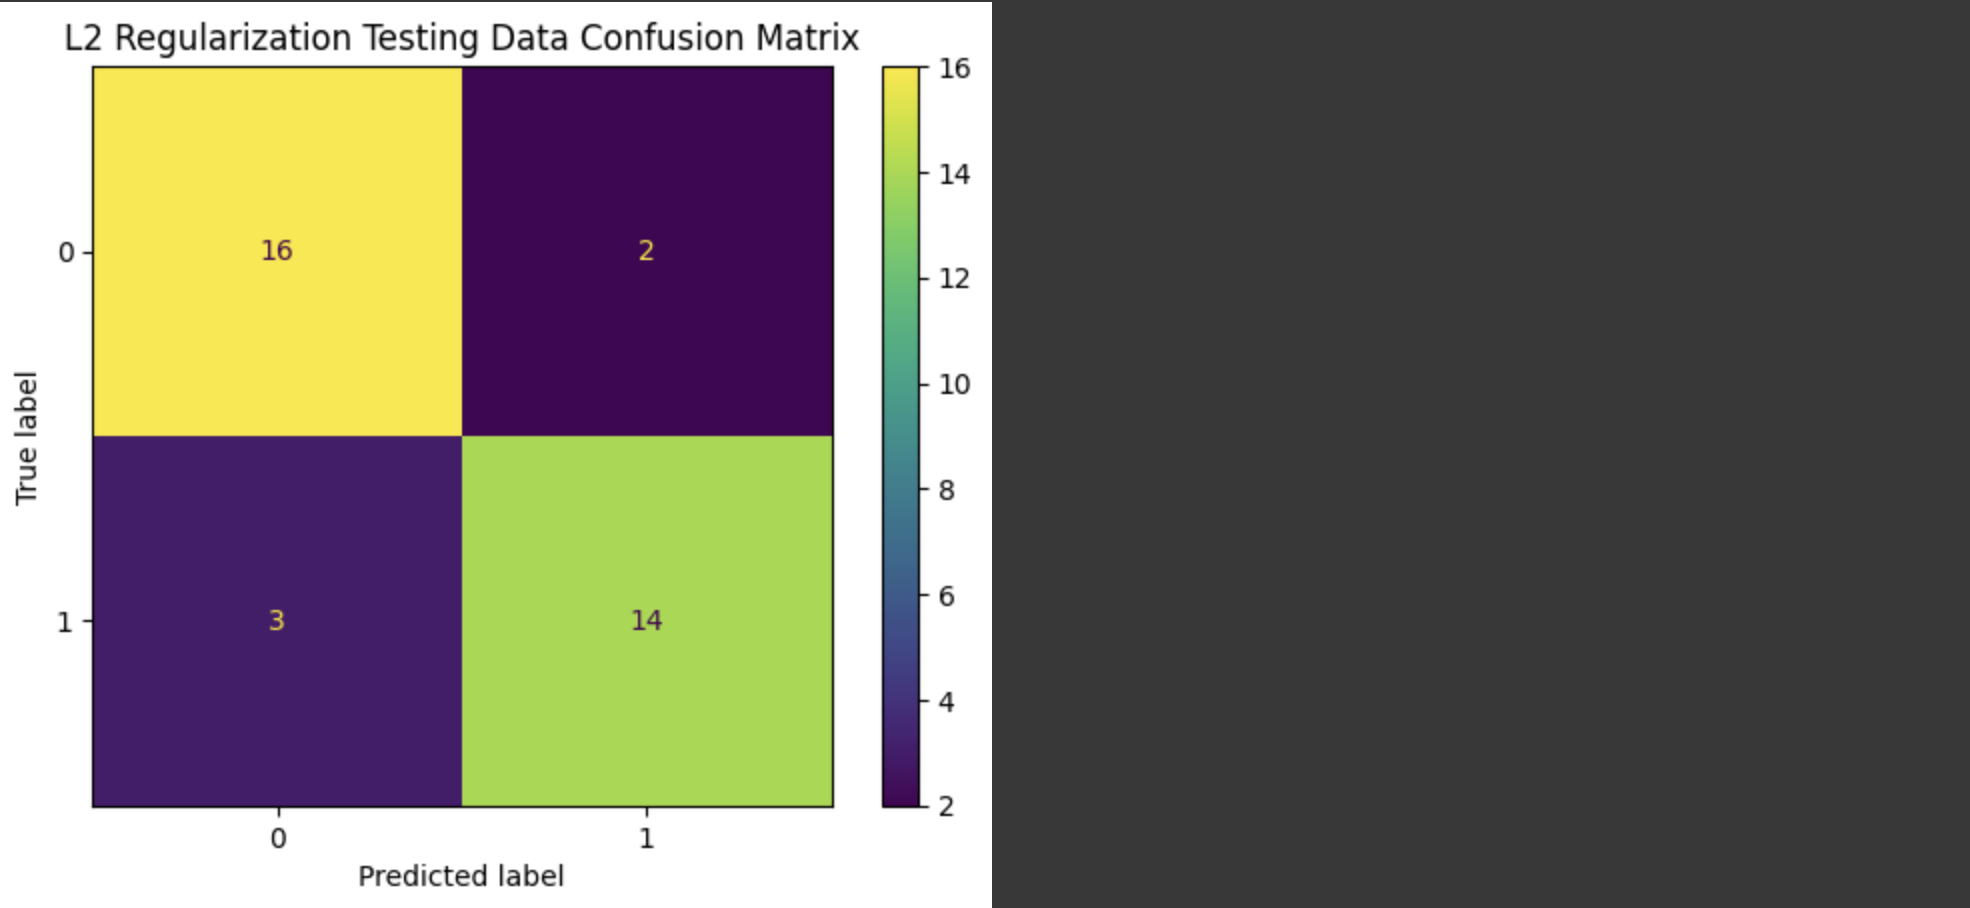


Finally, Elastic Net regularization showed an interesting set of coefficients; it pushed some coefficients to 0, similar to L1, but far fewer than L1 did. Using cross-validation, we found that the model performed best when the ratio of L1 to L2 regularization was set to roughly 0.15. The training and testing accuracies for this model were also 100% and 86%, respectively.

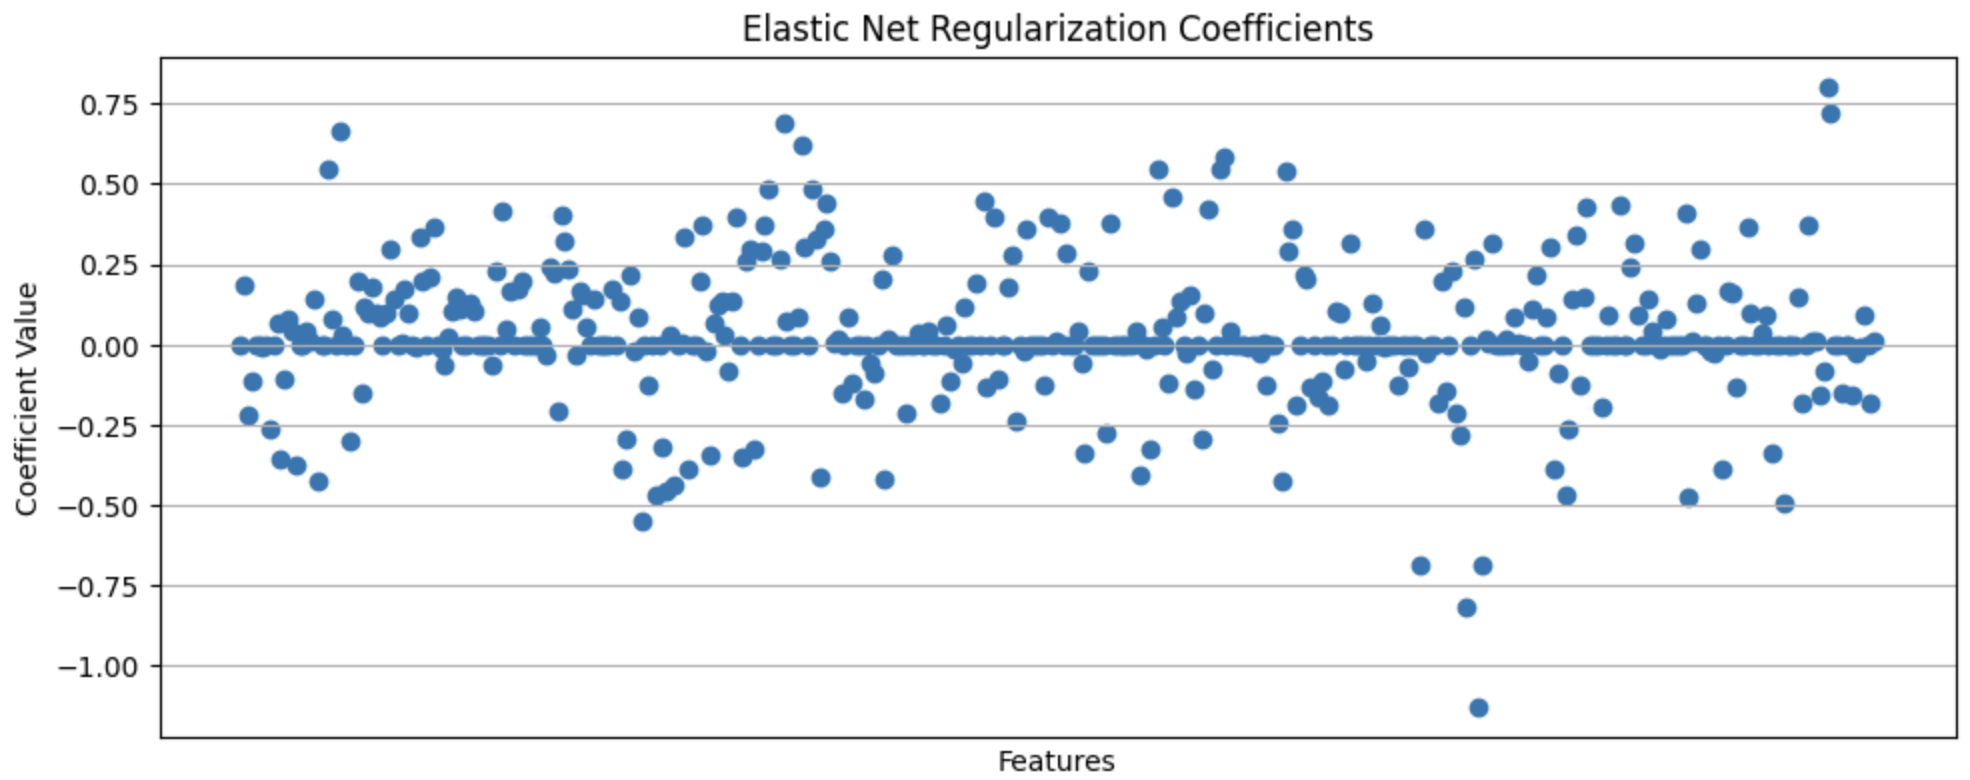

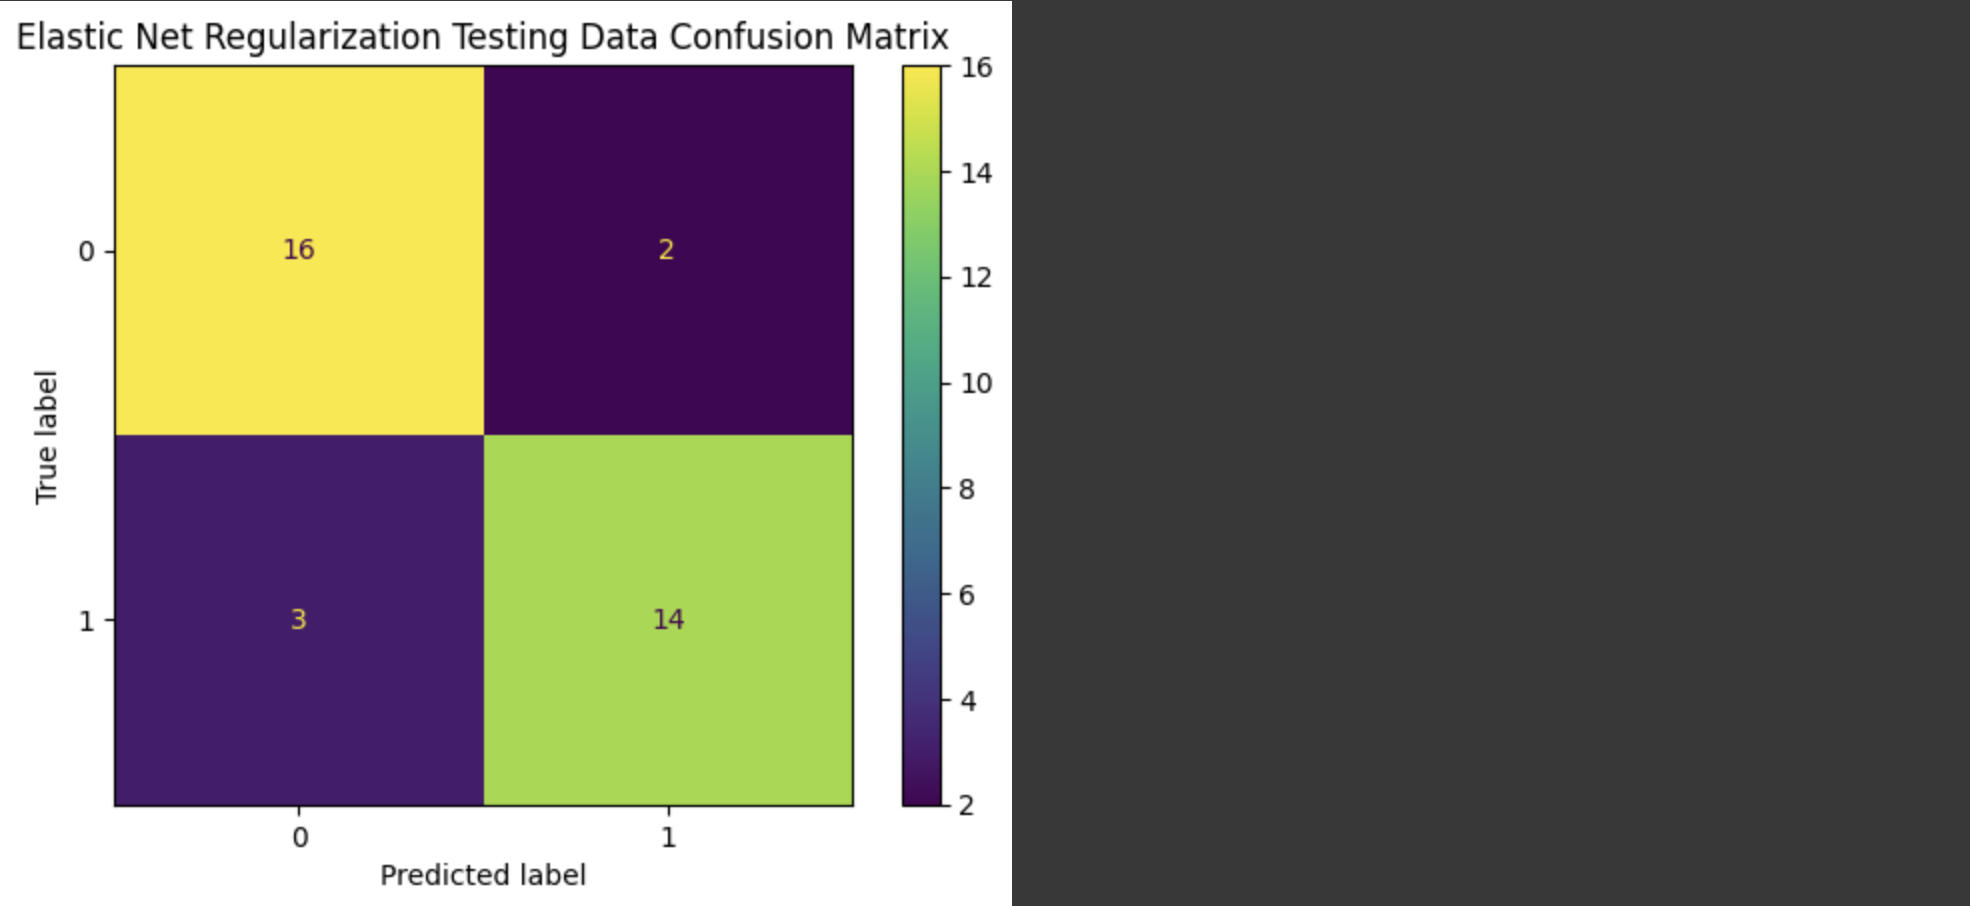

### Model 2: Perceptron

The initial perceptron that was trained had a training accuracy of 100% and a testing accuracy of 89%. See confusion matrices below. From the confusion matrices, we can see that for training data, there were no errors, and for testing data, 3 patients were incorrectly identified as healthy, and 1 healthy person was incorrectly identified as a patient.

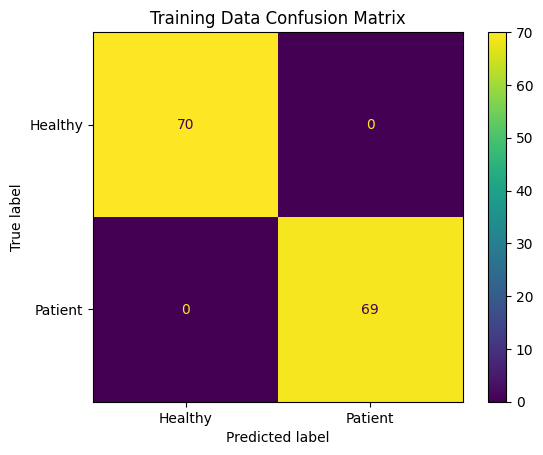

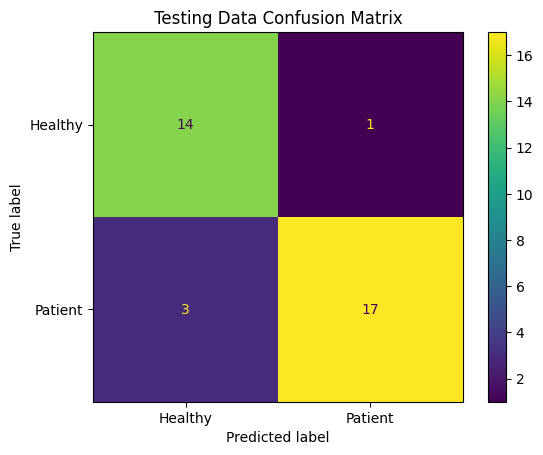

After optimization, we plotted the training and testing accuracy over 20 epochs. From this graph, we can see that the accuracy is very unstable until around the 10th iteration, at which it seems to stabilize.
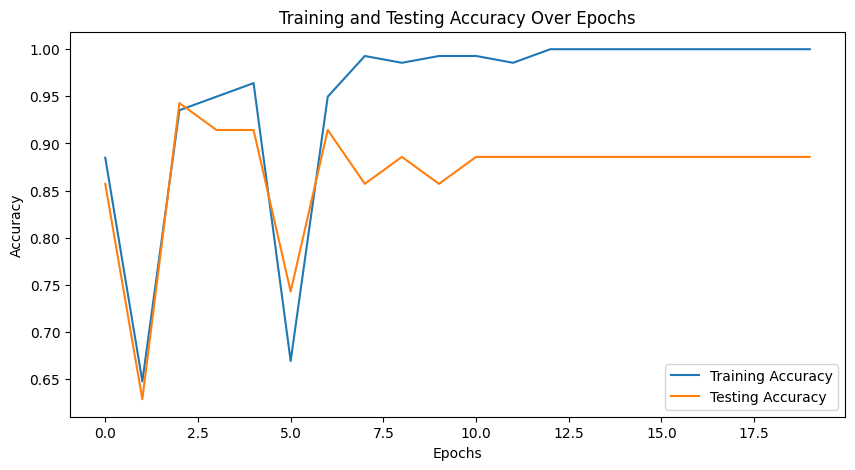


The Hinge loss of the model was also plotted for the 20 epochs, and a similar but inverse pattern can be seen in this figure. Figure. The loss reaches intense peaks and lows but again stabilizes at around the 10th iteration.
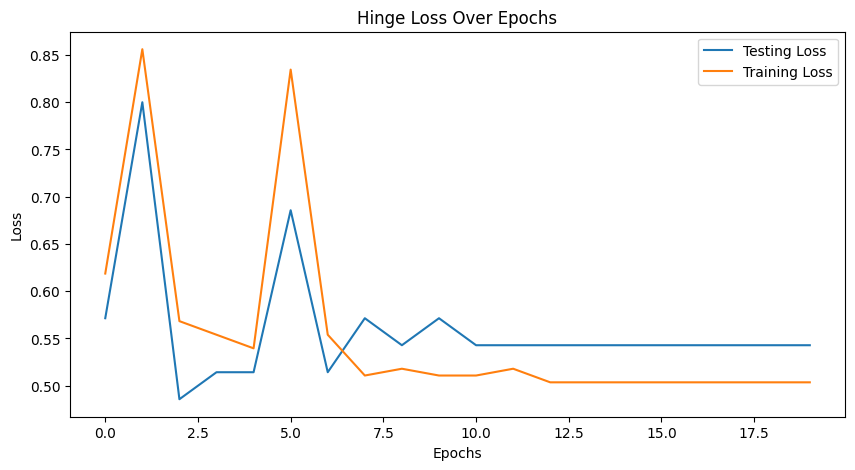

A plot of the weights for each features shows that the model is dependent on many of the features. The top 5 largest absolute value weights correponded to the features pressure_var19, mean_jerk_on_paper9, air_time13, mean_jerk_on_paper8, and gmrt_on_paper2.
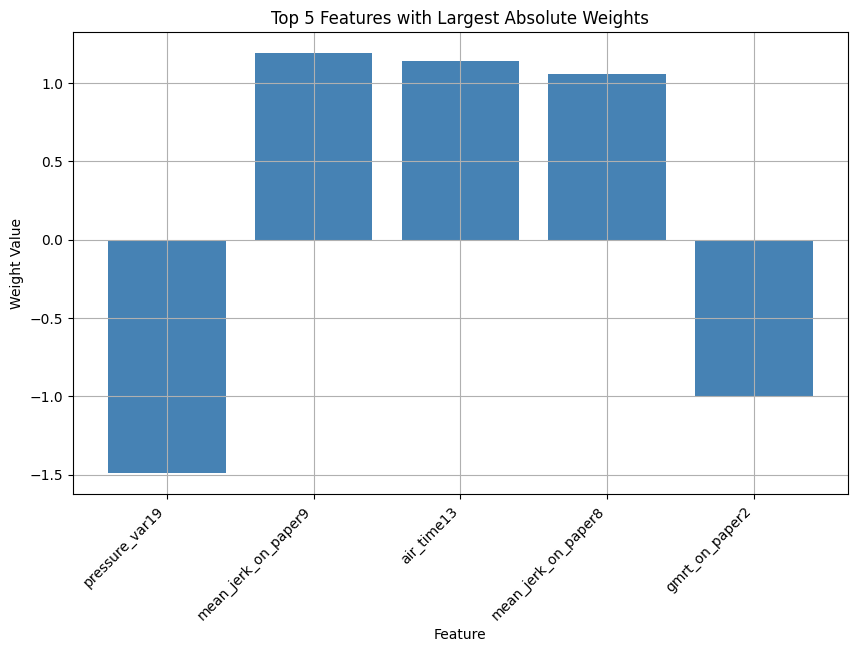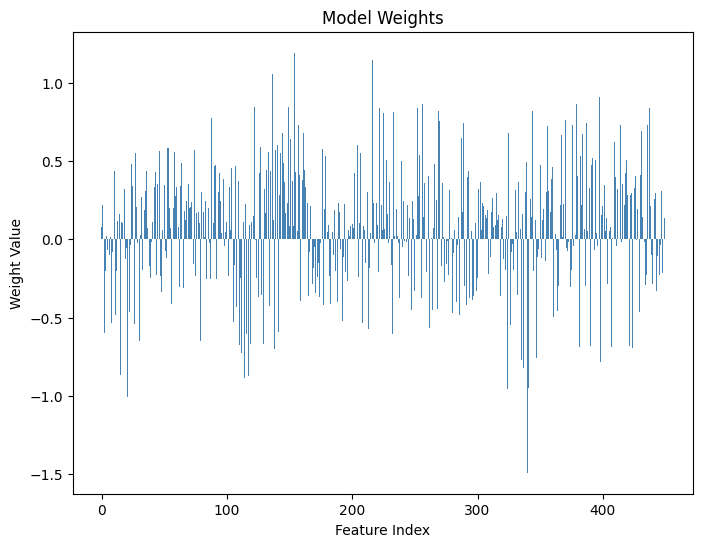

The optimized perceptron model had a testing accuracy of 89%. The Hinge loss of this model was 0.54. Once again, we used a confusion matrix to evaluate the model's effectiveness. Figure. From this, we see that 2 patients were incorrectly categorized as healthy, and 2 healthy people were incorrectly categorized as patients in the testing dataset.


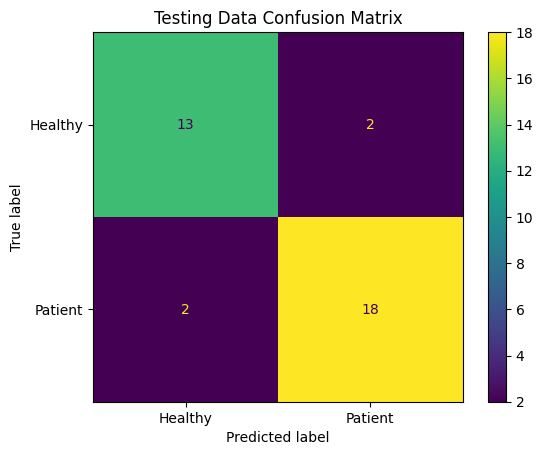

### Model 3: Decision Tree

This is the Confusion Matrix and Train and Test Accuracy vs epochs plot for the decision tree, along with the classification report.

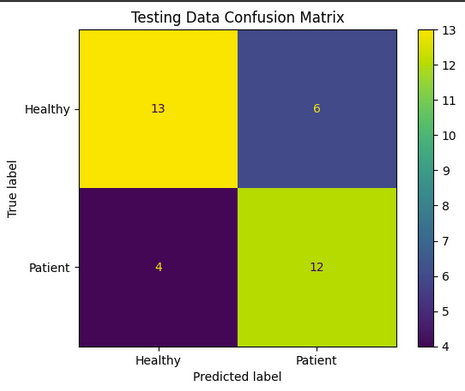

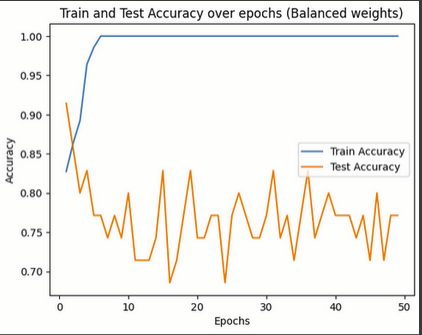

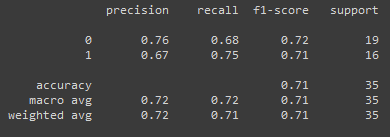

This is the Confusion Matrix and Train and Test Accuracy vs epochs plot for the random forest, along with the classification report.

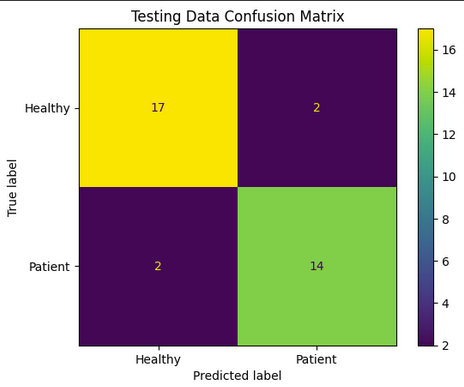

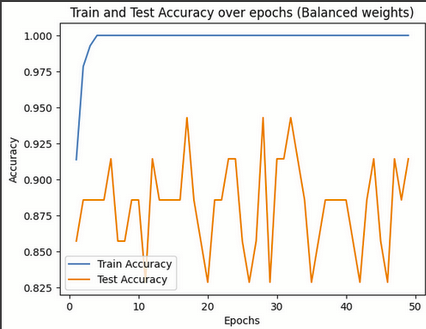

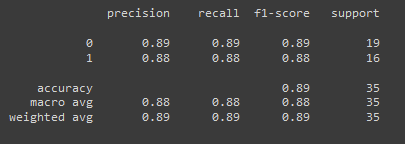

## Discussion

Model 1: Logistic Regression

The basic logistic regression model shows decent performance metrics, with a testing accuracy of 86%. Features found with a high positive correlation were "total_time15", "air_time15". On the other hand the features with highest negative correlation were "num_of_pendown19" and "pressure_var19". These features imply that the results of tests 15 and 19 were good at differentiating Alzheimer's and non-Alzheimer's patients.

However there are signs of overfitting indicated by the learning curve with a high training accuracy of 95%. While it effectively classifies the majority of instances, reducing overfitting through regularization, feature selection, and increasing training data can further enhance its generalization capability. Overall, the model provides a solid baseline for classification, with potential improvements available to optimize performance.

Model 2: Perceptron

The Perceptron model returned improved metrics, with a testing accuracy of 89%. From this model, we saw that 2 of the features corresponding to the highest weights were mean_jerk_on_paper9 and mean_jerk_on_paper8. Although measurements for features from each of the 25 tests were separate, this data gives us an understanding that mean_jerk_on_paper may be important for multiple of the tests, and ultimately in understanding Alzheimer's.

The perfect training accuracy suggests that overfitting may be present in this model as well. However, it provides a better prediction of our data than the previous logistic model.

Model 3: Decision Tree and Random Forest
The Decision Tree and Random forest provided decently high accuracies, as we achieved an accuracy of .71 for the decision tree, and an accuracy of 0.89 for the Random Forest. Random Forest showed a considerable increase in accuracy, and would probably be more efficient to use over a normal decision tree. However the main challenge we faced with the decision tree was overfitting. The difference between the training and test accuracies for both models is very large. If we had more time, we could have implemented oversampling to reduce overfitting and possibly increase accuracy. Compared to the perceptron, it did not do as good of a job at predicting which DARWIN tasks were more effective at indicating alzheimer's disease.

## Conclusion

What we found difficult about working with this data was that it consisted of 451 features, originating from 25 tests, each one with its own set of features. However, many of these features were repeated, but because the tests were different, we could not assume that they were able to be compiled as one feature. In the future we could have done an additional preprocessing on the columns to merge the 25 tests into one test, keeping the main metrics like "air time" and "speed on paper."

We also believe that the decision tree and random forest models could have been improved if we implemented oversampling.

Additionally, because much of the data was presented through 25 separate tests taken by 174 people, it means that we had fewer data points than our amount of data suggested.

Given more time, it would be interesting to examine the performance of additional models including Naive Bayes and Neural Networks. Neural Networks may be able to perform well on this, given the relative success of the Perceptron.



## Statement of Collaboration

In this project, we've been working together the following way:
 - Nick Ehsani: Leader. Contributed to the scheduling of meetings, and important decisions such as pivoting to our dataset when we hit a roadblock with preprocessing our Milestone 1 dataset. I worked on some of the preprocessing code and worked on a decision tree model. I worked on the writeup sections concerning the decision tree and random forest.
 - Livia Fingerson: Wrote perceptron notebook, worked on perceptron and small parts of other sections of the final report, and wrote readme memos for first 2 milestones.
 - Javier Perez: Helped on writeup and giving feedback regarding models/notebooks.
 - Arjun Sarup: Helped with writing the data exploration and data preprocessing code. Worked on logistic regression regularization variants. Assisted with some writeup help and model feedback.
 - Justin He - Helped in writing final report, logistic regression model, data exploration, providing feedback